**Import libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras.applications import VGG19



**Load and split data**

In [9]:
!cp /content/drive/MyDrive/ASL_classification/ASL.zip /content/

In [10]:
!unzip ASL.zip -d /content/ASL_dataset

Streaming output truncated to the last 5000 lines.
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (46).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (460).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (461).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (462).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (463).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (464).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (465).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (466).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (467).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (468).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (469).JPG  
 extracting: /content/ASL_dataset/ASL/ArASL_Database_54K/waw/WAW (47).JPG  
 extracting: /content/ASL_d

In [11]:
train_path = '/content/ASL_dataset/ASL'

In [12]:
arabic_alphabet = ['ع', 'ال', 'أ', 'ب', 'د', 'ظ', 'ض', 'ف', 'ق', 'غ', 'ه', 'ح', 'ج', 'ك', 'خ', 'لا', 'ل', 'م', 'ن', 'ر', 'ص', 'س', 'ش', 'ط', 'ت', 'ث', 'ذ', 'ة', 'و', 'ئ', 'ي', 'ز']

In [13]:
data = pd.read_csv('/content/ASL_dataset/ASL/Labels/ImagesClassPath.csv')
data.head(-5)

,id,ClassId,ImagePath
0,1,0,ArASL_Database_54K/ain/AIN (1).JPG
1,2,0,ArASL_Database_54K/ain/AIN (10).JPG
2,3,0,ArASL_Database_54K/ain/AIN (100).jpg
3,4,0,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,0,ArASL_Database_54K/ain/AIN (1001).JPG
...,...,...,...
54039,54040,31,ArASL_Database_54K/zay/ZAY (990).jpg
54040,54041,31,ArASL_Database_54K/zay/ZAY (991).jpg
54041,54042,31,ArASL_Database_54K/zay/ZAY (992).jpg
54042,54043,31,ArASL_Database_54K/zay/ZAY (993).jpg


In [14]:
for i in range(data.shape[0]):
    data.loc[i, 'ClassId'] = arabic_alphabet[data.loc[i, 'ClassId']]
data.head(-5)

/tmp/ipython-input-2835462808.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ع' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, 'ClassId'] = arabic_alphabet[data.loc[i, 'ClassId']]


,id,ClassId,ImagePath
0,1,ع,ArASL_Database_54K/ain/AIN (1).JPG
1,2,ع,ArASL_Database_54K/ain/AIN (10).JPG
2,3,ع,ArASL_Database_54K/ain/AIN (100).jpg
3,4,ع,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,ع,ArASL_Database_54K/ain/AIN (1001).JPG
...,...,...,...
54039,54040,ز,ArASL_Database_54K/zay/ZAY (990).jpg
54040,54041,ز,ArASL_Database_54K/zay/ZAY (991).jpg
54041,54042,ز,ArASL_Database_54K/zay/ZAY (992).jpg
54042,54043,ز,ArASL_Database_54K/zay/ZAY (993).jpg


In [15]:
df = pd.DataFrame({'img':data['ImagePath'],
                   'class':data['ClassId']})
df.head(-5)

,img,class
0,ArASL_Database_54K/ain/AIN (1).JPG,ع
1,ArASL_Database_54K/ain/AIN (10).JPG,ع
2,ArASL_Database_54K/ain/AIN (100).jpg,ع
3,ArASL_Database_54K/ain/AIN (1000).JPG,ع
4,ArASL_Database_54K/ain/AIN (1001).JPG,ع
...,...,...
54039,ArASL_Database_54K/zay/ZAY (990).jpg,ز
54040,ArASL_Database_54K/zay/ZAY (991).jpg,ز
54041,ArASL_Database_54K/zay/ZAY (992).jpg,ز
54042,ArASL_Database_54K/zay/ZAY (993).jpg,ز


In [16]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True)

df_train, df_val = train_test_split(df_train, test_size=0.1, shuffle=True)
print('Train shape:', df_train.shape)
print('Validation shape:', df_val.shape)
print('Test shape:', df_test.shape)



Train shape: (38915, 2)
Validation shape: (4324, 2)
Test shape: (10810, 2)


In [17]:
size=64
batch = 128
epochs = 17
steps_per_epoch=  data.shape[0] // batch


In [18]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=False)

datagenScale = ImageDataGenerator(rescale=1./255)

In [19]:
train_datagen = datagen.flow_from_dataframe(
    df_train,
    directory = train_path,
    x_col = 'img',
    y_col = 'class',
    target_size = (size,size),
    color_mode = 'rgb',
    shuffle = True,
    batch_size = batch)

val_datagen = datagenScale.flow_from_dataframe(
    df_val,
    directory = train_path,
    x_col = 'img',
    y_col = 'class',
    target_size= (size,size),
    color_mode = 'rgb',
    shuffle = True,
    batch_size = batch)

test_datagen = datagenScale.flow_from_dataframe(
    df_test,
    directory = train_path,
    x_col = 'img',
    y_col = 'class',
    target_size= (size,size),
    color_mode = 'rgb',
    shuffle = True,
    batch_size = 1)


Found 38915 validated image filenames belonging to 32 classes.
Found 4324 validated image filenames belonging to 32 classes.
Found 10810 validated image filenames belonging to 32 classes.


In [20]:
train_datagen.class_indices


{'أ': 0,
 'ئ': 1,
 'ال': 2,
 'ب': 3,
 'ة': 4,
 'ت': 5,
 'ث': 6,
 'ج': 7,
 'ح': 8,
 'خ': 9,
 'د': 10,
 'ذ': 11,
 'ر': 12,
 'ز': 13,
 'س': 14,
 'ش': 15,
 'ص': 16,
 'ض': 17,
 'ط': 18,
 'ظ': 19,
 'ع': 20,
 'غ': 21,
 'ف': 22,
 'ق': 23,
 'ك': 24,
 'ل': 25,
 'لا': 26,
 'م': 27,
 'ن': 28,
 'ه': 29,
 'و': 30,
 'ي': 31}

**VGG16 model**

In [21]:
vgg16Model = VGG16(weights='imagenet',include_top = False, input_shape=(size, size, 3))
for layer in vgg16Model.layers[:-8]:
    layer.trainable = False

for layer in vgg16Model.layers:
    print(layer, layer.trainable)
vgg16Model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<InputLayer name=input_layer, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> True
<Conv2D name=block4_conv2, built=True> True
<Conv2D name=block4_conv3, built=True> True
<MaxPooling2D name=block4_pool, built=True> True
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<MaxPooling2D name=block5_pool, built=True> True


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 12,979,200 (49.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [22]:
model = Sequential()
model.add(vgg16Model)

model.add(GlobalAveragePooling2D())
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Dense(32))
model.add(Activation('softmax'))

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [24]:
print(val_datagen.class_indices)

{'أ': 0, 'ئ': 1, 'ال': 2, 'ب': 3, 'ة': 4, 'ت': 5, 'ث': 6, 'ج': 7, 'ح': 8, 'خ': 9, 'د': 10, 'ذ': 11, 'ر': 12, 'ز': 13, 'س': 14, 'ش': 15, 'ص': 16, 'ض': 17, 'ط': 18, 'ظ': 19, 'ع': 20, 'غ': 21, 'ف': 22, 'ق': 23, 'ك': 24, 'ل': 25, 'لا': 26, 'م': 27, 'ن': 28, 'ه': 29, 'و': 30, 'ي': 31}


In [25]:
history = model.fit(train_datagen,
          validation_data = val_datagen,
          epochs= epochs,
          verbose=1,
          shuffle=True,
          )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 109s 310ms/step - accuracy: 0.1649 - loss: 3.0454 - val_accuracy: 0.5148 - val_loss: 1.3877
Epoch 2/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 82s 269ms/step - accuracy: 0.6825 - loss: 0.9441 - val_accuracy: 0.9228 - val_loss: 0.2570
Epoch 3/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 90s 296ms/step - accuracy: 0.8391 - loss: 0.5264 - val_accuracy: 0.9517 - val_loss: 0.1729
Epoch 4/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 82s 270ms/step - accuracy: 0.9063 - loss: 0.3222 - val_accuracy: 0.9577 - val_loss: 0.1357
Epoch 5/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 82s 268ms/step - accuracy: 0.9258 - loss: 0.2563 - val_accuracy: 0.9759 - val_loss: 0.0807
Epoch 6/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.9430 - loss: 0.2058 - val_accuracy: 0.9790 - val_loss: 0.0888
Epoch 7/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 82s 269ms/step - accuracy: 0.9303 - loss: 0.2403 - val_accuracy: 0.9833 - val_loss: 0.0632
Epoch 8/17
305/305 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.9483 - loss: 

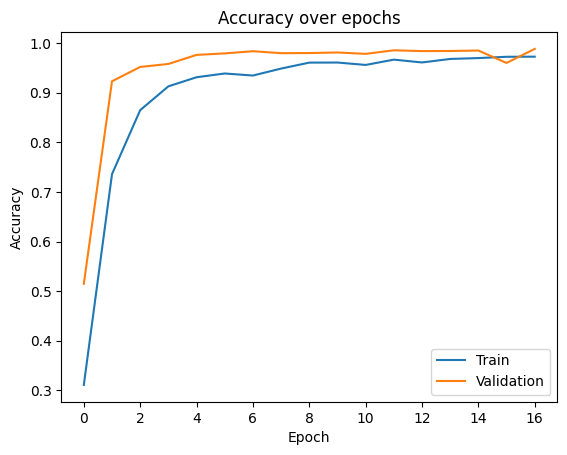

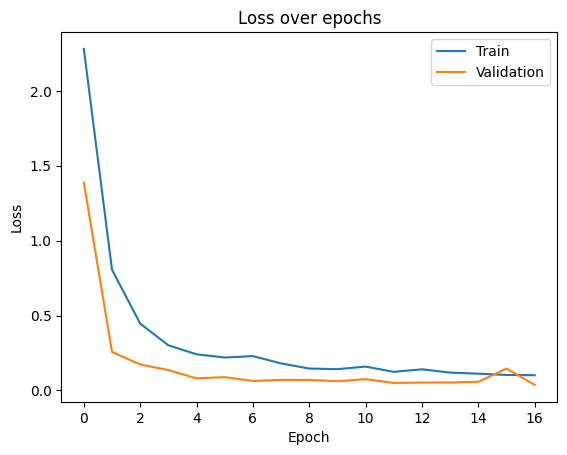

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# test the model
test_loss, test_accuracy = model.evaluate(test_datagen)
print(f'Loss: {test_loss}, accuracy: {test_accuracy}')

85/85 [==============================] - 22s 125ms/step - loss: 0.0389 - accuracy: 0.9882
Loss: 0.038908544927835464, accuracy: 0.9881591200828552


In [ ]:
# save the model
model.save('modelVGG16.hdf5')